In [1]:
import time
import sys
sys.path.append('../')
from pinn_magnetic_experimental import MultiPoleModel
import smtf_utility as util


TensorFlow version: 2.15.0


In [2]:
sim = util.bf_simulator([1, 1.33, 1.66, 1.99], 30, scale=1e9)
sim.add_dipole(0.5, 0,0,1,0,0)
sim.add_dipole(0,0.25,0,0,2,0)
sim.add_dipole(0,0,.15,0,0,3)

positions, values = sim.get_data()
positions, values = util.shuffle_data(positions, values)

In [3]:
model = MultiPoleModel(moments=3, lrate=.09, optimizer='adagrad', loss='huber', scale=1e9, early_stop=False, target_stop=1)
test_epochs = 2000

In [4]:
start = time.time()
model.fit(positions, values, epochs=test_epochs)
end = time.time()

epoch  0 --- Loss --- 57.07334
epoch  1 --- Loss --- 32.332333
epoch  2 --- Loss --- 29.186789
epoch  3 --- Loss --- 28.698984
epoch  4 --- Loss --- 25.960827
epoch  5 --- Loss --- 25.331123
epoch  6 --- Loss --- 24.521795
epoch  7 --- Loss --- 22.42424
epoch  8 --- Loss --- 22.738277
epoch  9 --- Loss --- 21.966303
epoch  10 --- Loss --- 21.068636
epoch  11 --- Loss --- 20.654747
epoch  12 --- Loss --- 19.464733
epoch  13 --- Loss --- 19.725317
epoch  14 --- Loss --- 18.636192
epoch  15 --- Loss --- 18.117434
epoch  16 --- Loss --- 18.247831
epoch  17 --- Loss --- 17.106161
epoch  18 --- Loss --- 17.316502
epoch  19 --- Loss --- 16.941172
epoch  20 --- Loss --- 15.694535
epoch  21 --- Loss --- 16.235445
epoch  22 --- Loss --- 15.126325
epoch  23 --- Loss --- 15.368608
epoch  24 --- Loss --- 14.467042
epoch  25 --- Loss --- 14.919883
epoch  26 --- Loss --- 14.368744
epoch  27 --- Loss --- 13.854858
epoch  28 --- Loss --- 13.948842
epoch  29 --- Loss --- 12.93721
epoch  30 --- Loss --- 

In [5]:
ellapsed_minutes = ((end - start) / 60)
print("Total training time: " + str(ellapsed_minutes) + " minutes")

Total training time: 10.868898594379425 minutes


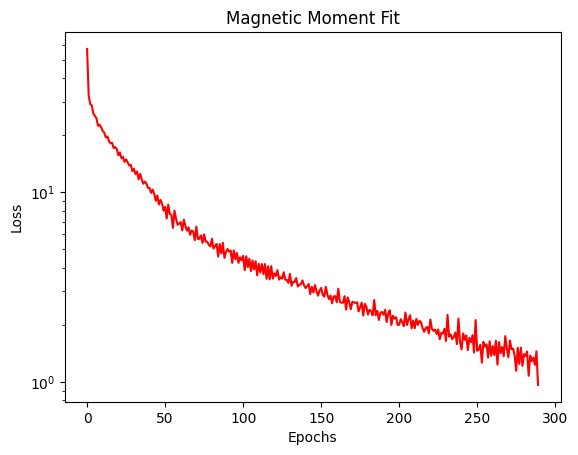

In [6]:
import matplotlib.pyplot as plt

y_axis = model.loss_history
x_axis = [*range(0, len(y_axis), 1)]

plt.plot(x_axis, y_axis, 'r-')
plt.yscale("log")
#plt.xscale("log")
plt.title('Magnetic Moment Fit')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [7]:
model.moment()

---- Moment  0 -----
Position:  [[ 0.50900483 -0.0080708  -0.00250817]]
Value:     [[0.9368895  0.04604001 0.02363014]]
---- Moment  1 -----
Position:  [[-0.00185307  0.27367622 -0.02068083]]
Value:     [[-0.04163896  1.7615478   0.23887204]]
---- Moment  2 -----
Position:  [[-0.01287724 -0.02091078  0.15671259]]
Value:     [[0.10338255 0.15528832 2.725168  ]]
